# **Task \#3**: Machine Learning MC886/MO444
##**Unsupervised Learning and Dimension Reduction Techniques**##

In [1]:
print('Marcelo Antunes Soares Fantini' + ' RA 108341')
print('Rubens de Castro Pereira' + ' RA 217146') 

Marcelo Antunes Soares Fantini RA 108341
Rubens de Castro Pereira RA 217146


## Objective:

Explore **Dimension Reduction Techniques** and **Unsupervised Algorithms** alternatives and come up with the best possible model for the problems.

## Dataset

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It consists of a collection of 70,000 handwritten digits, with each digit being a grayscale image of size 28x28 pixels. The digits range from 0 to 9 and are evenly distributed in the dataset.

Dataset Information:

- You should respect the following traininig/test split: 42,000 training examples, and 28,000 test examples.

- Each training and test example is assigned to what number is in the sample.

- Each row is a separate image. Column 1 is the class label. The remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255).

- The data is available at: ([Link of the Dataset](https://drive.google.com/drive/folders/13_nDDMrdIq2pCQU8kAnUQWBefpOAB-71?usp=sharing)): ```digit_recognizer_train.csv``` + ```digit_recognizer_test.csv```


More information about the dataset: *Y. Lecun, L. Bottou, Y. Bengio and P. Haffner, "Gradient-based learning applied to document recognition," in Proceedings of the IEEE, vol. 86, no. 11, pp. 2278-2324, Nov. 1998, doi: 10.1109/5.726791.https://ieeexplore.ieee.org/document/726791*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from PIL import Image

## ------ Read Dataset ----- ##
df = pd.read_csv('digit_recognizer_train.csv')
df = df.sample(frac=1)
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19707,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2257,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25102,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11436,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


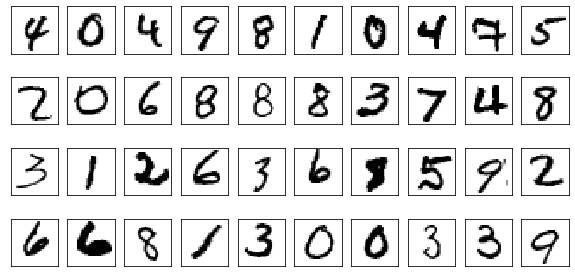

In [3]:
## ------ Plot Data ----- ##

fig, axes = plt.subplots(4, 10, figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(df.iloc[i][1:].values.reshape(28,28), cmap='binary', interpolation='nearest')

## 1. Dimensionality Reduction Techniques

Analyze the distribution by plotting th embeddings generated with the aid of dimensionality reduction techniques.

*Obs: Remember to normalize the data* and *test differents hyperparameters* 

In [4]:
# imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# random seed
np.random.seed(42)

In [5]:
# Selecting features and target variable
X_train = df.drop(columns=['label'])
y_train = df[['label']]

(0.5 point) Plot a 2D graph using the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) algorithm.

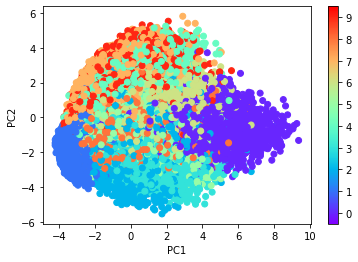

In [6]:
# TODO: Principal Component Analysis (PCA)
pca = PCA(n_components=2)

# Scales X features
normalized_X = X_train / 255.0

# Codifies y as labels
le = LabelEncoder()
y_num = le.fit_transform(np.ravel(y_train))

# PCA result
X_pca = pca.fit_transform(normalized_X)

# Plot PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_num, cmap='rainbow')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

(0.5 point) Plot a 2D graph using the [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

[t-SNE] Computing 361 nearest neighbors...
[t-SNE] Indexed 42000 samples in 0.160s...
[t-SNE] Computed neighbors for 42000 samples in 31.091s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42000
[t-SNE] Computed conditional probabilities for sample 2000 / 42000
[t-SNE] Computed conditional probabilities for sample 3000 / 42000
[t-SNE] Computed conditional probabilities for sample 4000 / 42000
[t-SNE] Computed conditional probabilities for sample 5000 / 42000
[t-SNE] Computed conditional probabilities for sample 6000 / 42000
[t-SNE] Computed conditional probabilities for sample 7000 / 42000
[t-SNE] Computed conditional probabilities for sample 8000 / 42000
[t-SNE] Computed conditional probabilities for sample 9000 / 42000
[t-SNE] Computed conditional probabilities for sample 10000 / 42000
[t-SNE] Computed conditional probabilities for sample 11000 / 42000
[t-SNE] Computed conditional probabilities for sample 12000 / 42000
[t-SNE] Computed conditional probabilities for s

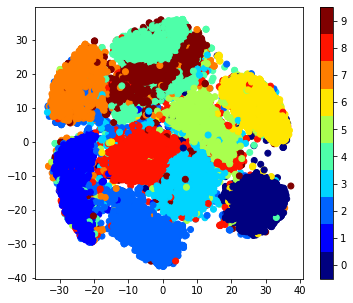

In [7]:
# TODO: T-distributed Stochastic Neighbor Embedding (t-SNE)

# Normalize X to apply t-SNE
normalized_X = X_train / 255.0

# Apply t-SNE
tsne = TSNE(n_components=2, 
            random_state=42, 
            perplexity=120, 
            verbose=1,
            n_iter=500,
            n_iter_without_progress=150,
            n_jobs=2,
            )
X_2d = tsne.fit_transform(normalized_X)

le = LabelEncoder()
y_num = le.fit_transform(np.ravel(y_train))

# Plot
plt.figure(figsize=(6,5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_num, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

(0.5 point) Plot a 2D graph using a combination of PCA + TSNE

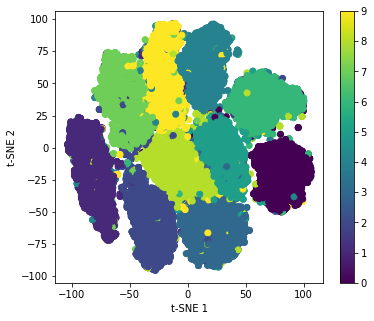

In [8]:
# TODO: PCA + t-SNE

# Initializes PCA
pca = PCA(n_components=50)

# Scales X features
normalized_X = X_train / 255.0

# Codifies y as labels
le = LabelEncoder()
y_num = le.fit_transform(np.ravel(y_train))

# PCA result
X_pca = pca.fit_transform(normalized_X)

# t-SNE application
tsne = TSNE(n_components=2, 
            random_state=42, 
            )
X_tsne_2D = tsne.fit_transform(X_pca)

le = LabelEncoder()
y_num = le.fit_transform(np.ravel(y_train))

# Plot
plt.figure(figsize=(6,5))
plt.scatter(X_tsne_2D[:, 0], X_tsne_2D[:, 1], c=y_num, cmap='viridis')
plt.colorbar()
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

(0.25 point) Plot a 3D graph using the best representation founded.

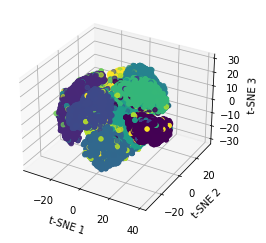

In [9]:
# TODO: 3D Graph

# Apply PCA to the dataset
pca = PCA(n_components=50)
X_pca = pca.fit_transform(normalized_X)

# Apply t-SNE to the PCA-transformed dataset
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3D = tsne.fit_transform(X_pca)

# Create a 3D plot of the t-SNE-transformed dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne_3D[:, 0], X_tsne_3D[:, 1], X_tsne_3D[:, 2], c=y_num, cmap='viridis')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')

# Show the plot
plt.show()

**(1.75 point) Questions:**
- What is the best representation, and why?
- Do the combination of techniques help improve the results?
- Did adding another dimension help enhance the performance?
- How can we use this knowledge to decide which model to train?

### Answers

1. The best representation is the combination of PCA to reduce the number of components to a smaller number, in this case we chose 50, and then use t-SNE to further reduce to two components only. **(Why?)**
2. Yes, the combination of the techniques has greatly improved the results, as seen in the 2D graph obtained. The clusters are well-defined in comparison to the graphs where PCA or t-SNE were used individually.
3. It did not enhance performance, the third dimension has worsened it. It took more than three times the time to output the 3D graph as it took to plot the 2D graph. You can't visualize all clusters because of the 3D nature of the graph.
4. We can use the best 2D model, which is the combination of PCA and t-SNE, which has the best performance and best clustering from all the models considered.

(Optional) Additionally, you can visually explore the data and its distribution by plotting the original image in a 2D space.

In [10]:
def plot_images(best_embedding, images, width=2000, height=1000, max_dim=10):
  '''
    best_embedding : np.array
      Best representation found

    images : np.array
      Original Images  
  '''
  
  tx, ty = best_embedding[:, 0], best_embedding[:, 1]
  tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
  ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

  full_image = Image.new('RGBA', (width, height))

  for data, x, y in zip(images, tx, ty):
    tile = Image.fromarray(np.uint8(data.reshape(28,28)))
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

  plt.figure(figsize = (16,12))
  plt.imshow(full_image)
  plt.show()

In [11]:
## Plot the original images using two arrays: 
#    best_embedding with the components (n_components=2) from either PCA or t-SNE;
#    images with the original data. Both arrays should correspond to the same data.

#plot_images(best_embedding, df)

(Optional) Besides this algorithms, another popular algorithm is Uniform Manifold Approximation and Projection ([UMAP](https://umap-learn.readthedocs.io/en/latest/)). Plot a 2D graph using this technique.

Obs: *here is a great video that explains this method and the differences between it and t-SNE*. 

Link: https://www.youtube.com/watch?v=eN0wFzBA4Sc&ab_channel=StatQuestwithJoshStarmer.

In [12]:
%pip install umap-learn -q

Note: you may need to restart the kernel to use updated packages.


A sintaxe do nome do arquivo, do nome do diret�rio ou do r�tulo do volume est� incorreta.


In [13]:
# Uniform Manifold Approximation and Projection (UMAP)

## 2. Unsupervised Learning

The main idea of this section is to train an unsupervised learning algorithm to identify the possible groups present in the MNIST dataset. 

(0.25 point) Train a KMeans algorithm using the best representation found in the previous section and plot the resulting clusters. Compare with the original representation.

*Obs: Use ``` n_cluster = 10 ``` for the KMeans algorithm.*

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

c:\Users\marce\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


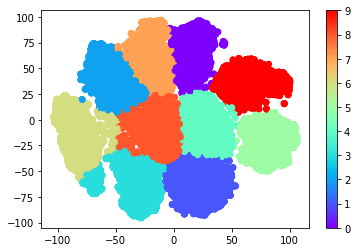

In [15]:
# TODO: KMeans with a dimension reduction technique.

# Training KMeans with 10 clusters, random state set for reproducibility
kmeans = KMeans(n_clusters=10, max_iter=300, random_state=42)

# Resulting y
y_kmeans = kmeans.fit_predict(X_tsne_2D)

# Plotting clusters
plt.scatter(X_tsne_2D[:, 0], X_tsne_2D[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.colorbar()
plt.show()

(0.5 points) Choose the best ```n_cluster``` using the Elbow Method. Plot the graph to assist.

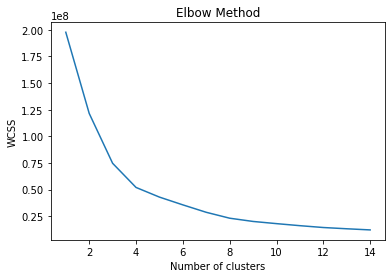

In [16]:
# TODO: Elbow Method and 2D plot

# Initialize list of inertia values
wcss = []

# Training loop for clusters of each size
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    max_iter=300, 
                    n_init=10, 
                    random_state=42)
    kmeans.fit(X_tsne_2D)

    # Append inertia of i-th cluster
    wcss.append(kmeans.inertia_)

# Plot inertia as a function of number of clusters
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

(0.5 points) Choose the best ```n_cluster``` using the Silhouette Analysis. Plot the silhouette and the average score.

In [17]:
# TODO: Silhouette Method -- Average Score and plot

# From elbow method
n_clusters = 4

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Evaluate the clustering performance


In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    """
    1st plot
    """


    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    """
    2nd plot showing clusters
    """

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

(0.25 points) Train a different clustering algorithm from the [scikit-learn library](https://scikit-learn.org/stable/modules/clustering.html) and compare its results with those of KMeans and the original data distribution.

In [18]:
# TODO: Unsupervised Algorithm of your choose



**(2 points) Questions:**

- Did KMeans provide good separation (clusters) when compared to the original distribution? Why?
- Did the Elbow and Silhouette methods suggest the same number of clusters? Did these techniques suggest the same n_cluster as the original dataset?
- If you did not know the number of classes in the MNIST dataset, which method would you use and why? Is the suggested number of clusters the same as the number of classes in the dataset? Why do you think it is the same or different?
- When compared to other algorithms, did KMeans perform better? How can different clustering techniques be compared?

### Answers

1. 
2. 
3. 
4. 

## 3. Classification with PCA

PCA can be used in combination with a supervised learning model.

(0.25 points) Baseline Model: Understanding the machine learning pipeline, explore a supervised model with the MNIST dataset.

obs: *Remember to split and normalize the data*

In [19]:
# TODO: Baseline Model



(0.5 points) PCA model: Redo the experiment with the inclusion of PCA. Plot the accuracy (or other classification metric) against ```n_components``` and analyze the model.

In [20]:
# TODO: Baseline Model with PCA



(0.25 points) Evaluate both the baseline model and the PCA model using the test set. Display the confusion matrices for both cases.

In [21]:
# TODO: Evaluate models in Test split



**(2 points) Questions:**

- Which model was used? What was the best result achieved without using PCA?
- What are your conclusions about the Baseline model?
- How did you define the best model for both approaches?
- Did the accuracy improve when using the PCA model?
- What are the advantages and disadvantages of using PCA on this dataset?


### Answers

1. 
2. 
3. 
4. 
5. 

## Deadline

Wednesday, May 22, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May 23, 11:59 pm : grade * 0.75
- May 24, 11:59 pm : grade * 0.5
- May 25, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**